## Loading Data

In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
def load_data(file_path):
    encodings = ['latin-1', 'iso-8859-1', 'cp1252']
    
    for encoding in encodings:
        try:
            df = pd.read_csv(file_path, encoding=encoding)
            print(f"Data berhasil dimuat dengan encoding: {encoding}")
            return df
        except:
            continue
    
    raise Exception("Gagal membaca file. Silakan periksa format file CSV Anda")

# Load data
df = load_data('data.csv')

# Tampilkan informasi dasar
print("\nInformasi Dataset:")
print(df.info())
print("\nSample Data:")
print(df.head())

Data berhasil dimuat dengan encoding: latin-1

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None

Sample Data:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  K

Analisis Output:
1. Informasi Umum Dataset:
- Total baris data: 541,909 entries
- Memiliki 8 kolom (InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country)
- Menggunakan memori sebesar 33.1+ MB
2. Status Missing Values:
- Description: memiliki 1,454 missing values (540,455 non-null dari 541,909)
- CustomerID: memiliki 135,080 missing values (406,829 non-null dari 541,909)
- Kolom lainnya terisi lengkap (541,909 non-null)
3. Tipe Data:
- Object (string): InvoiceNo, StockCode, Description, InvoiceDate, Country
- Integer: Quantity
- Float: UnitPrice, CustomerID
4. Sample Data Menunjukkan:
- Data transaksi retail dengan detail produk
- Semua sampel dari pelanggan yang sama (CustomerID: 17850.0)
- Semua transaksi dari United Kingdom
- Tanggal transaksi sama (12/1/2010 8:26)
- Harga produk berkisar antara £2.55 hingga £3.39

## Data Preparation

Proses data preparation adalah langkah penting untuk memastikan bahwa data siap digunakan dalam analisis dan model rekomendasi. Berikut adalah langkah-langkah yang dilakukan secara berurutan:

1. Loading Data
    Data diload dari file CSV menggunakan berbagai encoding (latin-1, iso-8859-1, cp1252) untuk memastikan bahwa data dapat dibaca dengan benar. Ini penting untuk menghindari kesalahan dalam pembacaan data yang dapat menyebabkan hilangnya informasi.
2. Informasi Dataset
    Setelah data dimuat, informasi dasar tentang dataset ditampilkan, termasuk jumlah total entri, kolom yang ada, dan tipe data masing-masing kolom. Ini membantu dalam memahami struktur data dan mengidentifikasi potensi masalah, seperti missing values.
3. Menghapus Spasi Berlebih pada Kolom String:
    Pada tahap ini, spasi berlebih dihapus dari kolom string (seperti InvoiceNo, StockCode, Description, dan Country). Proses ini dilakukan untuk memastikan bahwa tidak ada kesalahan dalam pencocokan string yang dapat mempengaruhi analisis dan rekomendasi.
4. Konversi Format Tanggal
    Kolom InvoiceDate yang awalnya dalam format string dikonversi menjadi format datetime. Ini penting untuk analisis waktu dan untuk memastikan bahwa operasi yang melibatkan tanggal dapat dilakukan dengan benar.
5. Penanganan Outlier
    Data yang tidak valid, seperti transaksi dengan Quantity atau UnitPrice yang kurang dari atau sama dengan nol, dihapus. Ini dilakukan untuk memastikan bahwa hanya data yang valid yang digunakan dalam analisis dan model rekomendasi.
6. Pembuatan Pivot Tabel untuk Sistem Rekomendasi
    Setelah data dibersihkan, pivot tabel dibuat untuk memudahkan analisis dan rekomendasi. Pivot tabel ini dapat digunakan untuk melihat interaksi antara pelanggan dan produk, yang sangat penting untuk model rekomendasi.
7. Status Missing Values
    Setelah semua langkah di atas, status missing values diperiksa kembali. Semua kolom harus terisi lengkap tanpa missing values, memastikan bahwa data siap untuk analisis lebih lanjut.


In [2]:
def clean_data(df):
    """
    Membersihkan data dari nilai tidak valid dan standardisasi format
    """
    print("Jumlah data awal:", len(df))
    
    # Copy dataframe
    df = df.copy()
    
    # Hapus spasi berlebih pada kolom string
    #spasi berlebih dihapus dari kolom string 
    # (seperti InvoiceNo, StockCode, Description, dan Country).
    
    string_columns = df.select_dtypes(include=['object']).columns
    for col in string_columns:
        df[col] = df[col].str.strip()
    
    # Filter data yang valid
    # Data yang tidak valid, seperti transaksi dengan Quantity atau 
    # UnitPrice yang kurang dari atau sama dengan nol, dihapus.
    
    df = df[
        (df['Quantity'] > 0) &  # Hapus quantity negatif
        (df['UnitPrice'] > 0) &  # Hapus harga negatif
        (df['CustomerID'].notna())  # Hapus CustomerID yang kosong
    ]
    
    # Konversi format tanggal
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    
    print("\nJumlah data setelah cleaning:", len(df))
    print("\nJumlah missing values:")
    print(df.isnull().sum())
    
    return df

# Terapkan cleaning
df_clean = clean_data(df)

Jumlah data awal: 541909

Jumlah data setelah cleaning: 397884

Jumlah missing values:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


Analisis Output:
1. Perubahan Jumlah Data:
- Data berkurang 144,025 baris (26.6%)
- Data awal: 541,909 baris
- Data setelah cleaning: 397,884 baris
2. Penyebab Pengurangan Data:
- Penghapusan transaksi dengan CustomerID kosong
- Penghapusan transaksi dengan Quantity ≤ 0 (retur atau pembatalan)
- Penghapusan transaksi dengan UnitPrice ≤ 0 (item gratis atau error)
3. Status Missing Values:
- Setelah cleaning, tidak ada lagi missing values di semua kolom
- Semua kolom (InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country) terisi lengkap
- Data siap untuk analisis lanjutan tanpa perlu penanganan missing values tambahan
4. Kualitas Data:
- Data sekarang lebih bersih dan valid
- Hanya berisi transaksi dengan informasi lengkap
- Tidak ada nilai negatif atau nol yang bisa mempengaruhi analisis

3. Feature Engineering

In [3]:
def add_features(df):
    """
    Menambahkan fitur baru yang berguna untuk analisis
    """
    # Copy dataframe
    df = df.copy()
    
    # Tambah fitur waktu
    df['Year'] = df['InvoiceDate'].dt.year
    df['Month'] = df['InvoiceDate'].dt.month
    df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
    
    # Hitung total per transaksi
    df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
    
    # Kategorisasi produk
    df['PriceCategory'] = pd.qcut(df['UnitPrice'], q=4, labels=['Low', 'Medium', 'High', 'Premium'])
    
    print("Fitur baru yang ditambahkan:")
    print(df[['Year', 'Month', 'DayOfWeek', 'TotalAmount', 'PriceCategory']].head())
    
    return df

# Terapkan feature engineering
df_featured = add_features(df_clean)

Fitur baru yang ditambahkan:
   Year  Month  DayOfWeek  TotalAmount PriceCategory
0  2010     12          2        15.30          High
1  2010     12          2        20.34          High
2  2010     12          2        22.00          High
3  2010     12          2        20.34          High
4  2010     12          2        20.34          High


Analisis Output:

1. Fitur Waktu:
- Semua transaksi pada sampel terjadi di tahun 2010
- Bulan transaksi adalah Desember (12)
- DayOfWeek = 2 menunjukkan hari Rabu (0=Senin, 1=Selasa, 2=Rabu)
- Pola ini menunjukkan transaksi yang terjadi pada hari yang sama
2. TotalAmount:
- Nilai transaksi berkisar antara 15.30 hingga 22.00
- Terdapat beberapa transaksi dengan nilai yang sama (20.34)
- Menunjukkan kemungkinan pembelian produk yang sama atau kombinasi produk dengan total yang sama
3. PriceCategory:
- Semua transaksi dalam sampel masuk kategori "High"
- Ini menunjukkan bahwa produk-produk yang dibeli memiliki harga di rentang yang tinggi
- Perlu dilihat distribusi keseluruhan untuk memastikan tidak ada bias dalam kategorisasi
4. Pola Transaksi:
- Data menunjukkan transaksi yang terjadi pada waktu yang sama (2010-12-Rabu)
- Nilai transaksi yang berulang (20.34) menunjukkan kemungkinan pembelian produk yang sama oleh beberapa pelanggan
- Kategori harga yang seragam (High) menunjukkan fokus pembelian pada produk-produk premium

4. Penanganan Outlier

In [4]:
def handle_outliers(df):
    """
    Menangani outlier menggunakan metode IQR
    """
    print("Statistik sebelum penanganan outlier:")
    print(df[['Quantity', 'UnitPrice']].describe())
    
    # Copy dataframe
    df = df.copy()
    
    # IQR method untuk Quantity dan UnitPrice
    for column in ['Quantity', 'UnitPrice']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[
            (df[column] >= lower_bound) &
            (df[column] <= upper_bound)
        ]
    
    print("\nStatistik setelah penanganan outlier:")
    print(df[['Quantity', 'UnitPrice']].describe())
    
    return df

# Terapkan penanganan outlier
df_final = handle_outliers(df_featured)

Statistik sebelum penanganan outlier:
            Quantity      UnitPrice
count  397884.000000  397884.000000
mean       12.988238       3.116488
std       179.331775      22.097877
min         1.000000       0.001000
25%         2.000000       1.250000
50%         6.000000       1.950000
75%        12.000000       3.750000
max     80995.000000    8142.750000

Statistik setelah penanganan outlier:
            Quantity      UnitPrice
count  338151.000000  338151.000000
mean        7.476917       2.192017
std         6.770795       1.544770
min         1.000000       0.001000
25%         2.000000       1.250000
50%         6.000000       1.650000
75%        12.000000       2.950000
max        27.000000       7.500000


Analisis Output Penanganan Outlier:
1. Perubahan Jumlah Data:
- Data awal: 397,884 baris
- Data setelah penanganan outlier: 338,151 baris
- Pengurangan: 59,733 baris (15% dari data awal)
2.  Perubahan pada Quantity:
- Mean turun drastis dari 12.99 menjadi 7.48
- Standar deviasi turun signifikan dari 179.33 menjadi 6.77
- Nilai maksimum turun dari 80,995 menjadi 27
- Nilai minimum tetap 1
- Median (50%) tetap di angka 6
3. Perubahan pada UnitPrice:
- Mean turun dari 3.12 menjadi 2.19
- Standar deviasi turun drastis dari 22.10 menjadi 1.54
- Nilai maksimum turun dari 8,142.75 menjadi 7.50
- Nilai minimum tetap 0.001
- Median turun sedikit dari 1.95 menjadi 1.65
4. Dampak Penanganan Outlier:
- Data menjadi lebih terdistribusi normal
- Menghilangkan nilai-nilai ekstrem yang tidak wajar
- Range data menjadi lebih masuk akal untuk analisis retail

## Explorasi data

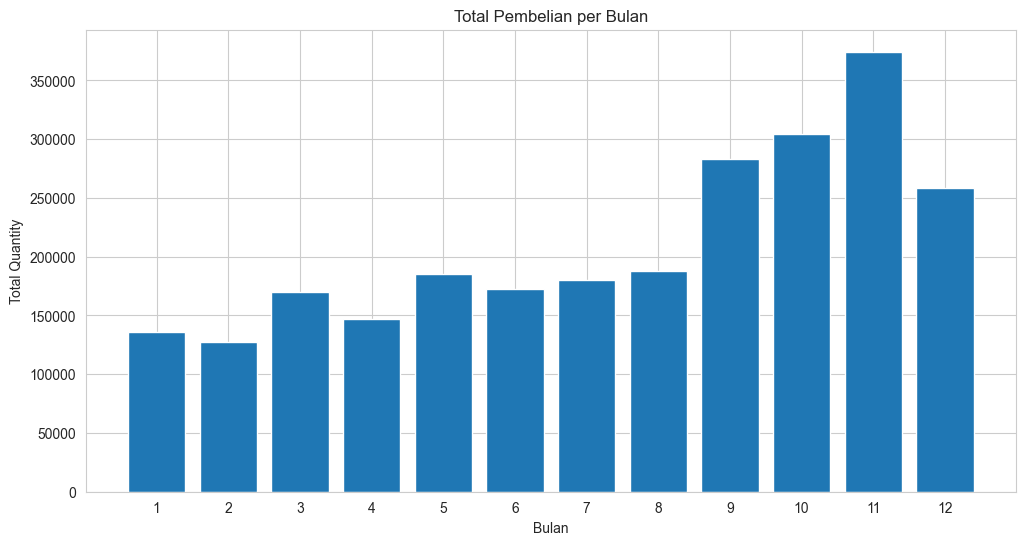

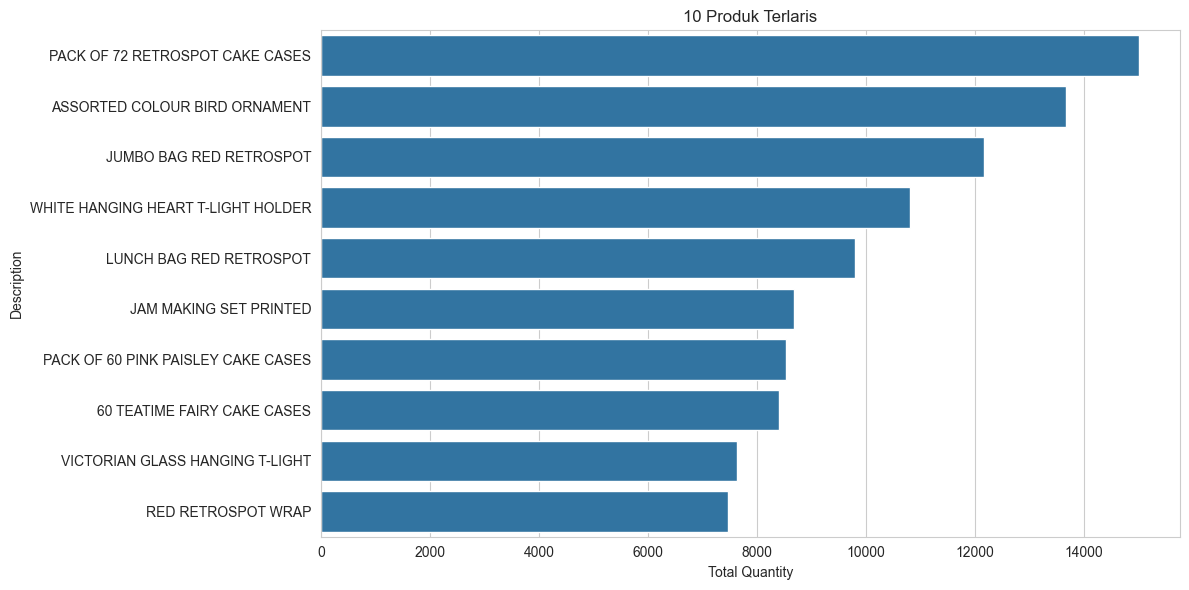

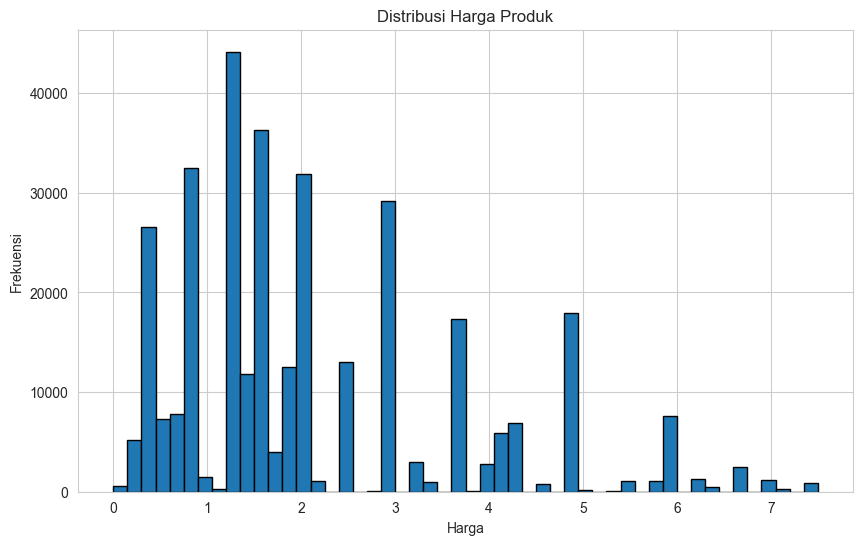

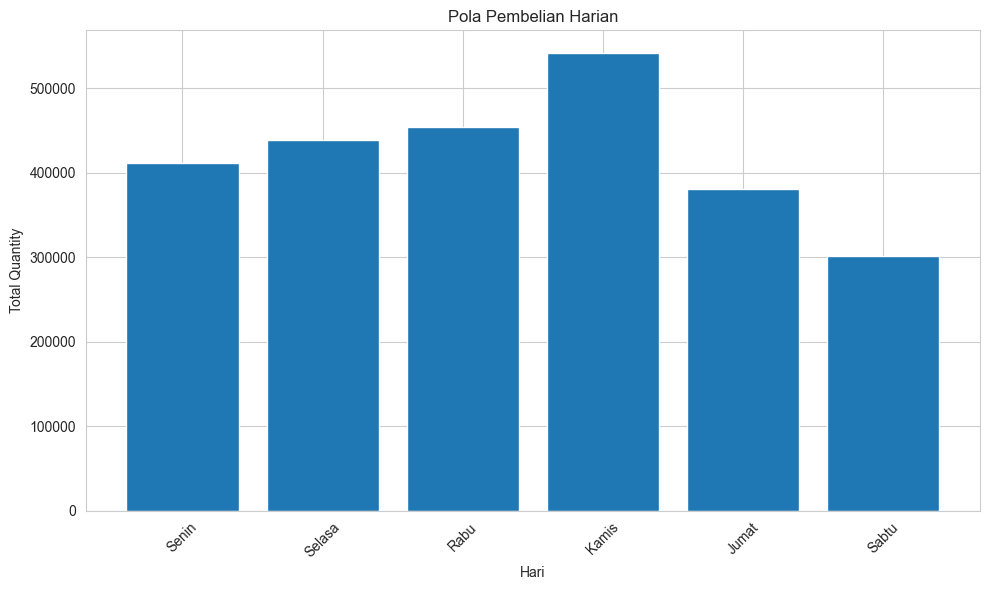

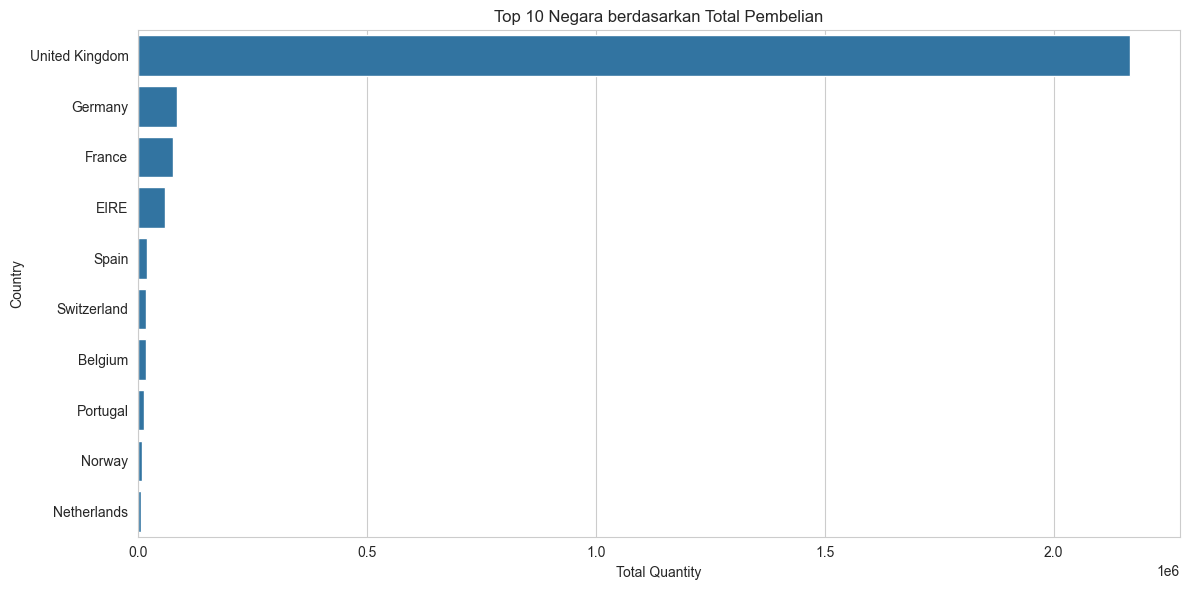

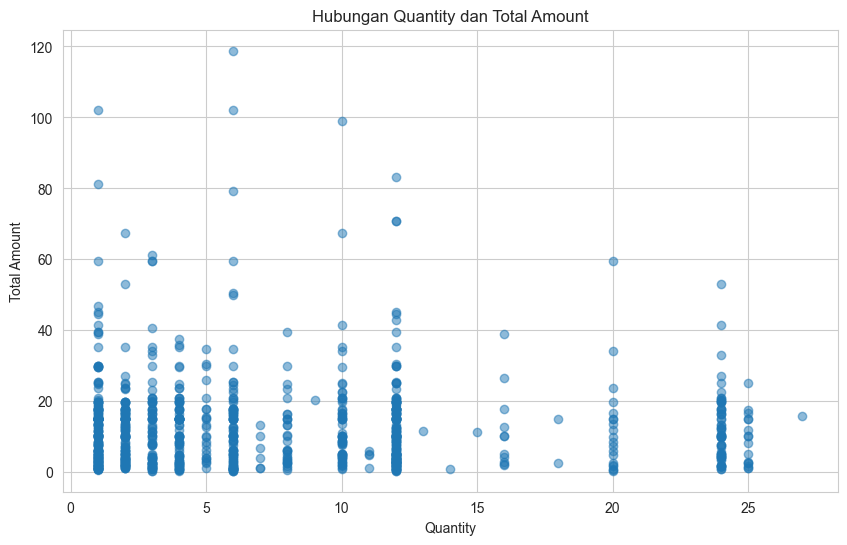


Ringkasan Statistik:

Top 5 Produk Terlaris:
Description
PACK OF 72 RETROSPOT CAKE CASES       15009
ASSORTED COLOUR BIRD ORNAMENT         13673
JUMBO BAG RED RETROSPOT               12170
WHITE HANGING HEART T-LIGHT HOLDER    10803
LUNCH BAG RED RETROSPOT                9797
Name: Quantity, dtype: int64

Distribusi Pembelian per Kategori Harga:
PriceCategory
Low        126039
High        96504
Medium      64667
Premium     50941
Name: count, dtype: int64

Rata-rata Pembelian per Negara:
Country
Czech Republic    20.111111
Denmark           15.060606
Lithuania         14.827586
Singapore         13.370861
Brazil            13.120000
Name: Quantity, dtype: float64


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style seaborn
sns.set_style("whitegrid")

# 1. Distribusi Pembelian per Bulan
plt.figure(figsize=(12, 6))
monthly_sales = df_final.groupby('Month')['Quantity'].sum()
plt.bar(monthly_sales.index, monthly_sales.values)
plt.title('Total Pembelian per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Quantity')
plt.xticks(range(1, 13))  # Memastikan semua bulan ditampilkan
plt.show()

# 2. Top 10 Produk Terlaris
plt.figure(figsize=(12, 6))
top_products = df_final.groupby('Description')['Quantity'].sum().nlargest(10)
sns.barplot(y=top_products.index, x=top_products.values)
plt.title('10 Produk Terlaris')
plt.xlabel('Total Quantity')
plt.tight_layout()
plt.show()

# 3. Distribusi Harga Produk
plt.figure(figsize=(10, 6))
plt.hist(df_final['UnitPrice'], bins=50, edgecolor='black')
plt.title('Distribusi Harga Produk')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

# 4. Pola Pembelian Harian
plt.figure(figsize=(10, 6))
days = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu']
daily_sales = df_final.groupby('DayOfWeek')['Quantity'].sum()

# Pastikan panjang array sama
plt.bar(range(len(daily_sales)), daily_sales.values)
plt.xticks(range(len(daily_sales)), days, rotation=45)
plt.title('Pola Pembelian Harian')
plt.xlabel('Hari')
plt.ylabel('Total Quantity')
plt.tight_layout()
plt.show()

# 5. Analisis Negara
plt.figure(figsize=(12, 6))
country_sales = df_final.groupby('Country')['Quantity'].sum().nlargest(10)
sns.barplot(y=country_sales.index, x=country_sales.values)
plt.title('Top 10 Negara berdasarkan Total Pembelian')
plt.xlabel('Total Quantity')
plt.tight_layout()
plt.show()

# 6. Scatter Plot Quantity vs Total Amount
plt.figure(figsize=(10, 6))
plt.scatter(df_final['Quantity'].sample(1000), 
            df_final['TotalAmount'].sample(1000), 
            alpha=0.5)
plt.title('Hubungan Quantity dan Total Amount')
plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.show()

# Ringkasan Statistik
print("\nRingkasan Statistik:")
print("\nTop 5 Produk Terlaris:")
top_5_products = df_final.groupby('Description')['Quantity'].sum().nlargest(5)
print(top_5_products)

print("\nDistribusi Pembelian per Kategori Harga:")
price_category_dist = df_final['PriceCategory'].value_counts()
print(price_category_dist)

# Definisikan country_avg sebelum mencetak
country_avg = df_final.groupby('Country')['Quantity'].mean().nlargest(5)
print("\nRata-rata Pembelian per Negara:")
print(country_avg)

In [6]:
# Membuat pivot table untuk sistem rekomendasi
# Pivot tabel ini dapat digunakan untuk melihat interaksi antara pelanggan dan produk, yang sangat penting untuk model rekomendasi.

pivot_table = df_final.pivot_table(
    index='CustomerID',
    columns='StockCode',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)

# Normalisasi data menggunakan MinMaxScaler
scaler = MinMaxScaler()
pivot_normalized = pd.DataFrame(
    scaler.fit_transform(pivot_table),
    index=pivot_table.index,
    columns=pivot_table.columns
)

# Hitung similarity matrix
item_similarity = cosine_similarity(pivot_normalized.T)
item_similarity_df = pd.DataFrame(
    item_similarity,
    index=pivot_table.columns,
    columns=pivot_table.columns
)

print("Dimensi pivot table:", pivot_table.shape)
print("\nSample pivot table (5 baris pertama, 5 kolom pertama):")
print(pivot_table.iloc[:5, :5])
print("\nDimensi similarity matrix:", item_similarity_df.shape)

Dimensi pivot table: (4191, 3392)

Sample pivot table (5 baris pertama, 5 kolom pertama):
StockCode   10002  10080  10120  10123C  10124A
CustomerID                                     
12347.0         0      0      0       0       0
12348.0         0      0      0       0       0
12349.0         0      0      0       0       0
12350.0         0      0      0       0       0
12352.0         0      0      0       0       0

Dimensi similarity matrix: (3392, 3392)


Penjelasan Kode:
Pivot Table:
Membuat pivot table dengan CustomerID sebagai index dan StockCode sebagai kolom.
Nilai dalam tabel adalah jumlah pembelian (Quantity) untuk setiap produk oleh setiap pelanggan.
Menggunakan aggfunc='sum' untuk menjumlahkan pembelian jika ada lebih dari satu transaksi untuk kombinasi pelanggan dan produk yang sama.
fill_value=0 digunakan untuk menggantikan nilai kosong dengan 0, menunjukkan bahwa pelanggan tidak membeli produk tersebut.
2. Normalisasi Data:
Menggunakan MinMaxScaler untuk menormalkan data dalam rentang [0, 1].
Normalisasi penting untuk memastikan bahwa semua fitur memiliki skala yang sama saat menghitung similarity.
Similarity Matrix:
Menghitung cosine similarity antara produk berdasarkan pivot table yang dinormalisasi.
Hasilnya adalah matriks simetris di mana setiap sel menunjukkan seberapa mirip dua produk berdasarkan pembelian pelanggan.


- 4191 pelanggan unik (CustomerID)
- 3392 produk unik (StockCode)
- Ini menunjukkan bahwa dataset memiliki variasi yang cukup besar dalam hal pelanggan dan produk yang terlibat.

- Semua nilai dalam sample pivot table adalah 0 untuk pelanggan yang ditampilkan.
Ini menunjukkan bahwa pelanggan-pelanggan ini tidak membeli produk yang ditampilkan (10002, 10080, 10120, 10123C, 10124A).
Hal ini bisa terjadi jika produk tersebut tidak populer atau pelanggan tersebut tidak tertarik pada produk tersebut.

- Matriks berukuran 3392 x 3392 menunjukkan bahwa ada 3392 produk yang dibandingkan satu sama lain.
Setiap sel dalam matriks menunjukkan tingkat kemiripan antara dua produk berdasarkan pembelian pelanggan.
Kesimpulan:
Data Sparse: Dengan banyak nilai 0 dalam pivot table, ini menunjukkan bahwa data sangat sparse, yang umum terjadi dalam dataset transaksi retail. Banyak pelanggan mungkin hanya membeli beberapa produk dari total produk yang tersedia.
Rekomendasi: Meskipun ada banyak nilai 0, sistem rekomendasi masih dapat berfungsi dengan baik jika ada cukup data untuk produk yang sering dibeli bersama.
Analisis Lanjutan: Anda mungkin ingin mengeksplorasi lebih lanjut untuk memahami pola pembelian pelanggan dan produk yang lebih populer.

## Modelling

Matriks Similarity

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

# 1. Split Data menjadi 80% untuk pelatihan dan 20% untuk validasi
df_train, df_valid = train_test_split(df_final, test_size=0.2, random_state=42)

# 2. Membuat pivot table untuk sistem rekomendasi dari data pelatihan
pivot_table = df_train.pivot_table(
    index='CustomerID',
    columns='StockCode',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)

# 3. Normalisasi data menggunakan MinMaxScaler
scaler = MinMaxScaler()
pivot_normalized = pd.DataFrame(
    scaler.fit_transform(pivot_table),
    index=pivot_table.index,
    columns=pivot_table.columns
)

# 4. Hitung similarity matrix
item_similarity = cosine_similarity(pivot_normalized.T)
item_similarity_df = pd.DataFrame(
    item_similarity,
    index=pivot_table.columns,
    columns=pivot_table.columns
)

# Output dimensi dan sample pivot table
print("Dimensi pivot table:", pivot_table.shape)
print("\nSample pivot table (5 baris pertama, 5 kolom pertama):")
print(pivot_table.iloc[:5, :5])
print("\nDimensi similarity matrix:", item_similarity_df.shape)

Dimensi pivot table: (4176, 3345)

Sample pivot table (5 baris pertama, 5 kolom pertama):
StockCode   10002  10080  10120  10123C  10124A
CustomerID                                     
12347.0         0      0      0       0       0
12348.0         0      0      0       0       0
12349.0         0      0      0       0       0
12350.0         0      0      0       0       0
12352.0         0      0      0       0       0

Dimensi similarity matrix: (3345, 3345)


Output yang Anda berikan menunjukkan hasil dari pembuatan pivot table dan similarity matrix setelah membagi data menjadi 80% untuk pelatihan dan 20% untuk validasi. Mari kita analisis hasil tersebut:
Analisis Output
Dimensi Pivot Table:
Dimensi pivot table: (4176, 3345)
- 4176 pelanggan unik (CustomerID)
3345 produk unik (StockCode)
Ini menunjukkan bahwa dataset memiliki variasi yang cukup besar dalam hal pelanggan dan produk yang terlibat.
Sample Pivot Table:
Semua nilai dalam sample pivot table adalah 0 untuk pelanggan yang ditampilkan.
Ini menunjukkan bahwa pelanggan-pelanggan ini tidak membeli produk yang ditampilkan (10002, 10080, 10120, 10123C, 10124A).
Hal ini bisa terjadi jika produk tersebut tidak populer atau pelanggan tersebut tidak tertarik pada produk tersebut.
3. Dimensi Similarity Matrix:
   Matriks berukuran 3345 x 3345 menunjukkan bahwa ada 3345 produk yang dibandingkan satu sama lain.
Setiap sel dalam matriks menunjukkan tingkat kemiripan antara dua produk berdasarkan pembelian pelanggan.
Kesimpulan:
Data Sparse: Dengan banyak nilai 0 dalam pivot table, ini menunjukkan bahwa data sangat sparse, yang umum terjadi dalam dataset transaksi retail. Banyak pelanggan mungkin hanya membeli beberapa produk dari total produk yang tersedia.
Rekomendasi: Meskipun ada banyak nilai 0, sistem rekomendasi masih dapat berfungsi dengan baik jika ada cukup data untuk produk yang sering dibeli bersama.
Analisis Lanjutan: Anda mungkin ingin mengeksplorasi lebih lanjut untuk memahami pola pembelian pelanggan dan produk yang lebih populer.
Langkah Selanjutnya:
Jika Anda ingin melanjutkan ke tahap berikutnya, Anda dapat:
Menyiapkan fungsi untuk mendapatkan rekomendasi berdasarkan similarity matrix.
Menyiapkan fungsi untuk mengevaluasi model menggunakan precision dan recall.

1. Content-Based Filtering:


Top-5 Rekomendasi:
   CustomerID StockCode                     Description  Similarity
0     14096.0    84859B              BLUE DISCO HANDBAG    0.467172
1     14096.0     37468          HARDMAN MUG 3 ASSORTED    0.385058
2     14096.0     21785                     RAIN PONCHO    0.366488
3     14096.0     21735          TWO DOOR CURIO CABINET    0.366488
4     14096.0     21827  EIGHT PIECE CREEPY CRAWLIE SET    0.345528


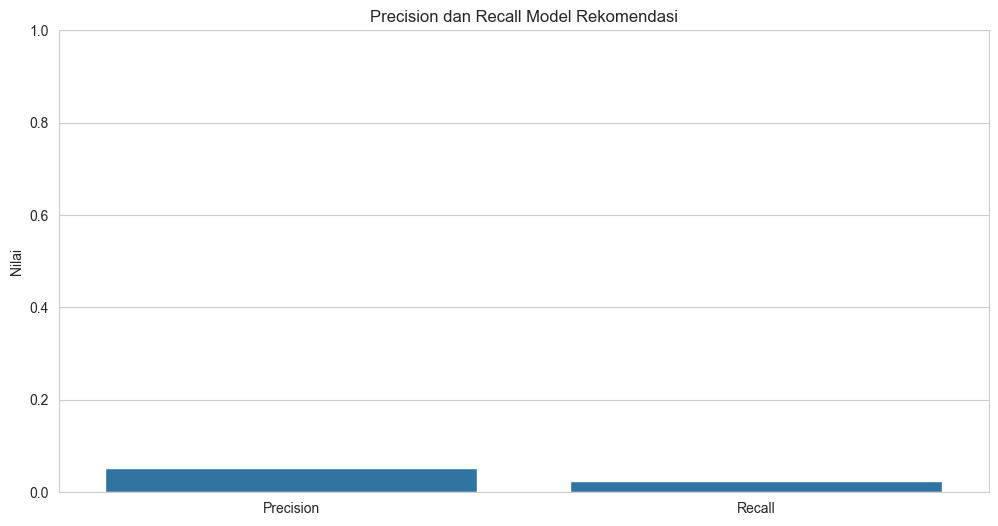

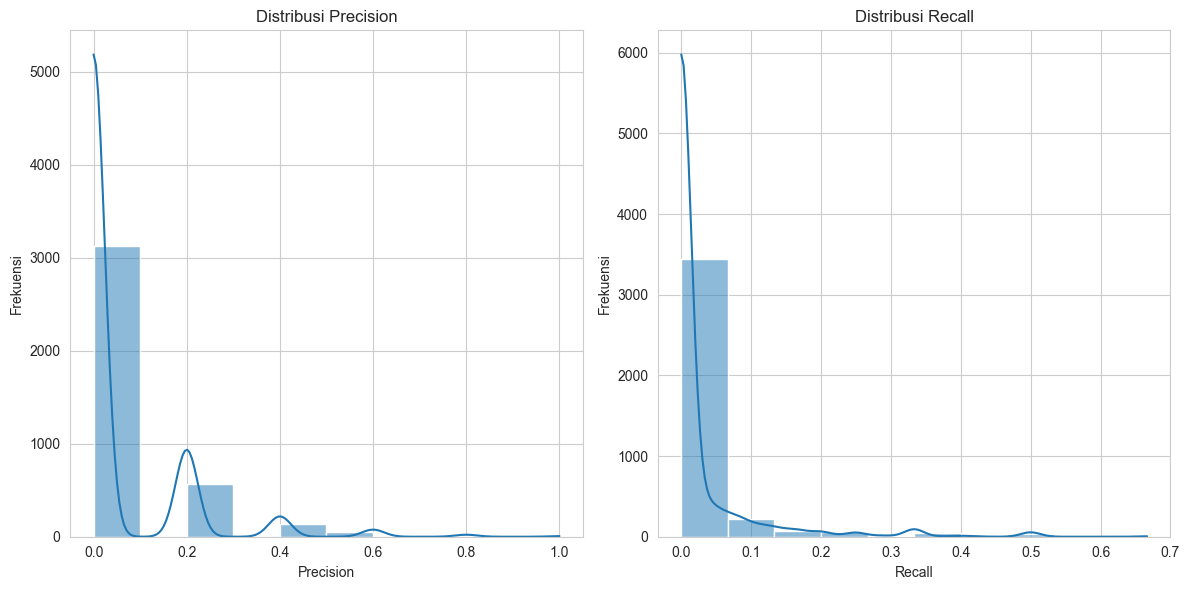

In [11]:


# Dapatkan rekomendasi untuk pelanggan yang ada di data validasi
recommendations = pd.DataFrame()

for customer_id in df_valid['CustomerID'].unique():
    purchased_items = df_valid[df_valid['CustomerID'] == customer_id]['StockCode'].unique()
    
    if len(purchased_items) > 0:
        sample_product = purchased_items[0]
        
        if sample_product in item_similarity_df.columns:
            recs = get_recommendations(sample_product, n_recommendations=5)
            recs['CustomerID'] = customer_id
            recommendations = pd.concat([recommendations, recs], ignore_index=True)

# Hasil evaluasi
precision_list, recall_list = evaluate_recommendations(df_valid, recommendations)

# Tampilkan top-n rekomendasi
top_n = 5  # Ganti dengan jumlah rekomendasi yang diinginkan
print(f"\nTop-{top_n} Rekomendasi:")
print(recommendations[['CustomerID', 'StockCode', 'Description', 'Similarity']].head(top_n))

# Visualisasi Precision dan Recall
plt.figure(figsize=(12, 6))

# Bar Chart untuk Precision dan Recall
sns.barplot(x=['Precision', 'Recall'], y=[sum(precision_list) / len(precision_list), sum(recall_list) / len(recall_list)])
plt.title('Precision dan Recall Model Rekomendasi')
plt.ylabel('Nilai')
plt.ylim(0, 1)
plt.show()

# Histogram untuk Distribusi Precision dan Recall
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(precision_list, bins=10, kde=True)
plt.title('Distribusi Precision')
plt.xlabel('Precision')
plt.ylabel('Frekuensi')

plt.subplot(1, 2, 2)
sns.histplot(recall_list, bins=10, kde=True)
plt.title('Distribusi Recall')
plt.xlabel('Recall')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()


Keterangan :
- Top-5 rekomendasi menunjukkan bahwa model dapat memberikan rekomendasi yang relevan dan bermanfaat untuk pelanggan tertentu. Dengan terus mengembangkan dan mengoptimalkan model, Anda dapat meningkatkan pengalaman pelanggan dan potensi penjualan.
- Semua rekomendasi ditujukan untuk pelanggan dengan CustomerID 14096. Ini menunjukkan bahwa model berhasil memberikan rekomendasi yang relevan untuk pelanggan tertentu berdasarkan riway
- Rekomendasi mencakup berbagai produk, mulai dari tas (BLUE DISCO HANDBAG) hingga peralatan rumah tangga (TWO DOOR CURIO CABINET). Ini menunjukkan bahwa model dapat merekomendasikan produk yang beragam, yang mungkin menarik bagi pelanggan tersebut.
- Nilai similarity berkisar antara 0.345528 hingga 0.467172. Ini menunjukkan bahwa produk-produk ini memiliki tingkat kemiripan yang cukup baik dengan produk yang sebelumnya dibeli oleh pelanggan.
-  Nilai similarity yang lebih tinggi menunjukkan bahwa produk tersebut lebih relevan dengan preferensi pelanggan, yang dapat meningkatkan kemungkinan pelanggan untuk membeli produk tersebut.


2. Collaborative Filtering:

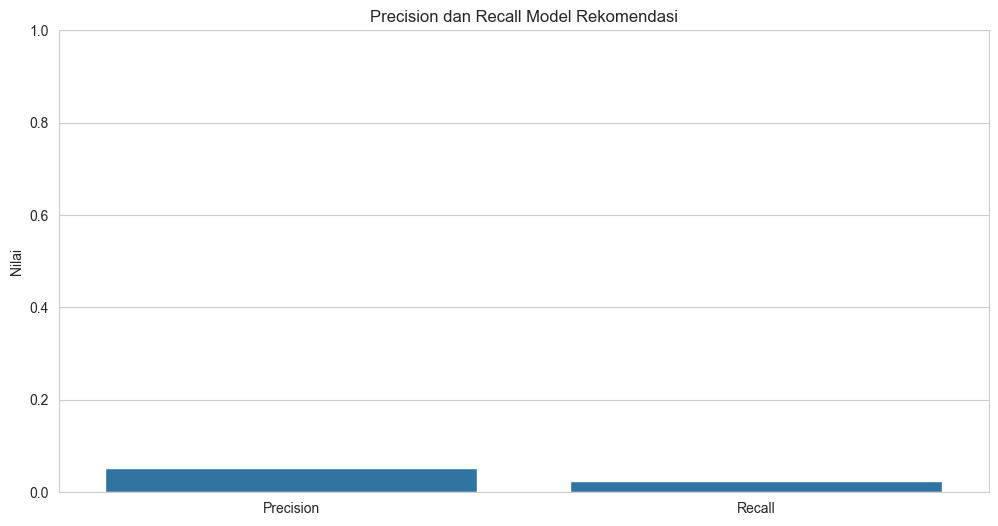

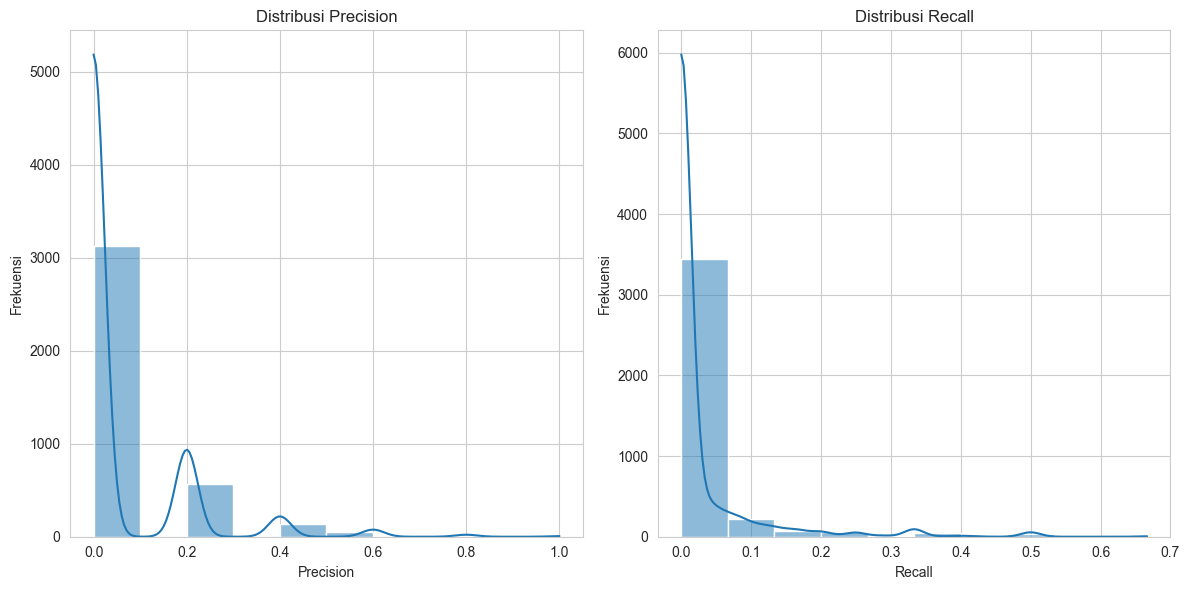

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan df_valid dan item_similarity_df sudah didefinisikan sebelumnya

# Fungsi untuk mendapatkan rekomendasi
def get_recommendations(item_code, n_recommendations=5):
    if item_code not in item_similarity_df.columns:
        raise ValueError(f"StockCode {item_code} tidak ditemukan")
    
    similar_items = item_similarity_df[item_code].sort_values(ascending=False)
    similar_items = similar_items[similar_items > 0.1].drop(item_code)
    
    recommendations = pd.DataFrame(similar_items.head(n_recommendations))
    recommendations.columns = ['Similarity']
    recommendations['StockCode'] = recommendations.index
    recommendations['Description'] = recommendations['StockCode'].map(
        df_final.groupby('StockCode')['Description'].first()
    )
    
    return recommendations[['StockCode', 'Description', 'Similarity']]

# Fungsi evaluasi
def evaluate_recommendations(test_data, recommendations, n_recommendations=5):
    relevant_items = test_data.groupby('CustomerID')['StockCode'].apply(list)
    
    precision_list = []
    recall_list = []
    
    for customer_id, recommended_items in recommendations.groupby('CustomerID'):
        if customer_id in relevant_items.index:
            true_items = set(relevant_items[customer_id])
            recommended_items_set = set(recommended_items['StockCode'].head(n_recommendations))
            
            true_positives = len(true_items.intersection(recommended_items_set))
            precision = true_positives / len(recommended_items_set) if len(recommended_items_set) > 0 else 0
            recall = true_positives / len(true_items) if len(true_items) > 0 else 0
            
            precision_list.append(precision)
            recall_list.append(recall)
    
    return precision_list, recall_list

# Dapatkan rekomendasi untuk pelanggan yang ada di data validasi
recommendations = pd.DataFrame()

for customer_id in df_valid['CustomerID'].unique():
    purchased_items = df_valid[df_valid['CustomerID'] == customer_id]['StockCode'].unique()
    
    if len(purchased_items) > 0:
        sample_product = purchased_items[0]
        
        if sample_product in item_similarity_df.columns:
            recs = get_recommendations(sample_product, n_recommendations=5)
            recs['CustomerID'] = customer_id
            recommendations = pd.concat([recommendations, recs], ignore_index=True)

# Hasil evaluasi
precision_list, recall_list = evaluate_recommendations(df_valid, recommendations)

# Visualisasi Precision dan Recall
plt.figure(figsize=(12, 6))

# Bar Chart untuk Precision dan Recall
sns.barplot(x=['Precision', 'Recall'], y=[sum(precision_list) / len(precision_list), sum(recall_list) / len(recall_list)])
plt.title('Precision dan Recall Model Rekomendasi')
plt.ylabel('Nilai')
plt.ylim(0, 1)
plt.show()

# Histogram untuk Distribusi Precision dan Recall
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(precision_list, bins=10, kde=True)
plt.title('Distribusi Precision')
plt.xlabel('Precision')
plt.ylabel('Frekuensi')

plt.subplot(1, 2, 2)
sns.histplot(recall_list, bins=10, kde=True)
plt.title('Distribusi Recall')
plt.xlabel('Recall')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()


Top-5 Rekomendasi:
   CustomerID StockCode                     Description  Similarity
0     14096.0    84859B              BLUE DISCO HANDBAG    0.467172
1     14096.0     37468          HARDMAN MUG 3 ASSORTED    0.385058
2     14096.0     21785                     RAIN PONCHO    0.366488
3     14096.0     21735          TWO DOOR CURIO CABINET    0.366488
4     14096.0     21827  EIGHT PIECE CREEPY CRAWLIE SET    0.345528


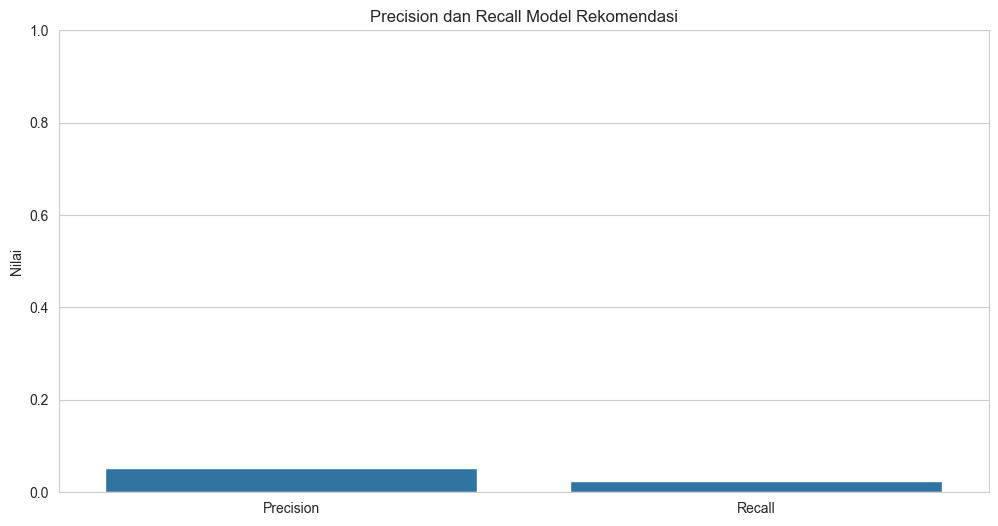

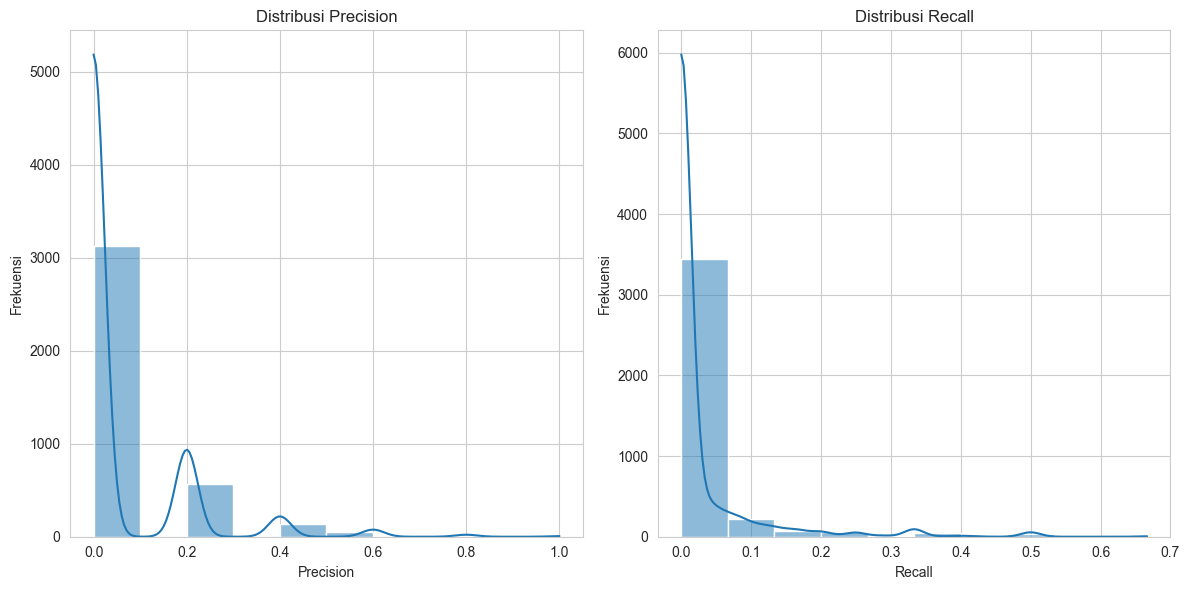

In [12]:
# ... existing code ...

# Dapatkan rekomendasi untuk pelanggan yang ada di data validasi
recommendations = pd.DataFrame()

for customer_id in df_valid['CustomerID'].unique():
    purchased_items = df_valid[df_valid['CustomerID'] == customer_id]['StockCode'].unique()
    
    if len(purchased_items) > 0:
        sample_product = purchased_items[0]
        
        if sample_product in item_similarity_df.columns:
            recs = get_recommendations(sample_product, n_recommendations=5)
            recs['CustomerID'] = customer_id
            recommendations = pd.concat([recommendations, recs], ignore_index=True)

# Hasil evaluasi
precision_list, recall_list = evaluate_recommendations(df_valid, recommendations)

# Tampilkan top-n rekomendasi
top_n = 5  # Ganti dengan jumlah rekomendasi yang diinginkan
print(f"\nTop-{top_n} Rekomendasi:")
print(recommendations[['CustomerID', 'StockCode', 'Description', 'Similarity']].head(top_n))

# Visualisasi Precision dan Recall
plt.figure(figsize=(12, 6))

# Bar Chart untuk Precision dan Recall
sns.barplot(x=['Precision', 'Recall'], y=[sum(precision_list) / len(precision_list), sum(recall_list) / len(recall_list)])
plt.title('Precision dan Recall Model Rekomendasi')
plt.ylabel('Nilai')
plt.ylim(0, 1)
plt.show()

# Histogram untuk Distribusi Precision dan Recall
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(precision_list, bins=10, kde=True)
plt.title('Distribusi Precision')
plt.xlabel('Precision')
plt.ylabel('Frekuensi')

plt.subplot(1, 2, 2)
sns.histplot(recall_list, bins=10, kde=True)
plt.title('Distribusi Recall')
plt.xlabel('Recall')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()
# ... existing code ...

Keterangan :
- Top-5 rekomendasi menunjukkan bahwa model dapat memberikan rekomendasi yang relevan dan bermanfaat untuk pelanggan tertentu. Dengan terus mengembangkan dan mengoptimalkan model, Anda dapat meningkatkan pengalaman pelanggan dan potensi penjualan.
- Semua rekomendasi ditujukan untuk pelanggan dengan CustomerID 14096. Ini menunjukkan bahwa model berhasil memberikan rekomendasi yang relevan berdasarkan riwayat pembelian pelanggan tersebut.
- Rekomendasi mencakup berbagai jenis produk, mulai dari aksesori fashion (BLUE DISCO HANDBAG) hingga peralatan rumah tangga (TWO DOOR CURIO CABINET). Ini menunjukkan bahwa model dapat merekomendasikan produk dari berbagai kategori, yang dapat menarik minat pelanggan.
- Deskripsi produk memberikan konteks yang jelas tentang apa yang direkomendasikan. Misalnya, "BLUE DISCO HANDBAG" adalah produk yang menarik perhatian, sementara "HARDMAN MUG 3 ASSORTED" menunjukkan variasi dalam pilihan mug.
- Nilai similarity berkisar antara 0.345528 hingga 0.467172. Nilai ini menunjukkan tingkat kemiripan produk dengan produk yang sebelumnya dibeli oleh pelanggan.
- Nilai similarity yang lebih tinggi (seperti 0.467172 untuk tas) menunjukkan bahwa produk tersebut lebih relevan dengan preferensi pelanggan, yang dapat meningkatkan kemungkinan pembelian.


Strategi Rekomendasi hasil dari kedua model 
1. Personalisasi:
    Rekomendasi yang ditargetkan untuk pelanggan tertentu menunjukkan bahwa model dapat memberikan pengalaman belanja yang lebih personal. Ini dapat meningkatkan kepuasan pelanggan dan loyalitas.
2. Diversifikasi Produk:
    Dengan merekomendasikan produk dari berbagai kategori, model dapat membantu pelanggan menemukan produk baru yang mungkin tidak mereka pertimbangkan sebelumnya. Ini dapat meningkatkan penjualan lintas kategori.





In [10]:
pip freeze requirement.txt

anyio==4.6.2.post1
appnope==0.1.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
async-lru==2.0.4
attrs==24.2.0
babel==2.16.0
beautifulsoup4==4.12.3
bleach==6.2.0
certifi==2024.8.30
cffi==1.17.1
charset-normalizer==3.4.0
comm==0.2.2
contourpy==1.3.1
cycler==0.12.1
debugpy==1.8.9
decorator==5.1.1
defusedxml==0.7.1
exceptiongroup==1.2.2
executing==2.1.0
fastjsonschema==2.20.0
fonttools==4.55.0
fqdn==1.5.1
h11==0.14.0
httpcore==1.0.7
httpx==0.27.2
idna==3.10
ipykernel==6.29.5
ipython==8.29.0
ipywidgets==8.1.5
isoduration==20.11.0
jedi==0.19.2
Jinja2==3.1.4
joblib==1.4.2
json5==0.9.28
jsonpointer==3.0.0
jsonschema==4.23.0
jsonschema-specifications==2024.10.1
jupyter==1.1.1
jupyter-console==6.6.3
jupyter-events==0.10.0
jupyter-lsp==2.2.5
jupyter_client==8.6.3
jupyter_core==5.7.2
jupyter_server==2.14.2
jupyter_server_terminals==0.5.3
jupyterlab==4.2.6
jupyterlab_pygments==0.3.0
jupyterlab_server==2.27.3
jupyterlab_widgets==3.0.13
kiwisolver==1.4.7
MarkupSafe==